<a href="https://colab.research.google.com/github/LUCASDNORONHA/exploracao-dados-indigenas-2010-2022/blob/main/Projeto_de_Analise_de_Dados_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTITUTO DE EDUCAÇÃO SUPERIOR DE BRASÍLIA – IESB**
### Curso de Ciência de Dados e Inteligência Artificial  
### Disciplina: Introdução à Ciência de Dados  
### Professor: Alexandre Vaz Roriz  
### Turma: CIANM1A  
### Aluno: Lucas Dias Noronha  

---

## 🧪 Projeto de Análise de Dados Exploratória

### **Tema da Base de Dados**  
**Pessoas indígenas, por localização e situação do domicílio, segundo as Grandes Regiões e as Unidades da Federação – Brasil – 2010/2022**

### **Fonte dos Dados**  
[Instituto Brasileiro de Geografia e Estatística – IBGE](https://www.ibge.gov.br/estatisticas/sociais/populacao/22827-censo-demografico-2022.html?edicao=42267&t=resultados)

---

### 📅 Brasília – DF | 2025


In [608]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from google.colab import drive

In [609]:
drive.mount('/content/drive')
db = pd.read_excel("/content/drive/MyDrive/Tabela_complementar_06 (1).xlsx")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [610]:
db

,Censo Demográfico 2022,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,Indígenas: Principais características das pess...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Tabela complementar 6 - Pessoas indígenas, por...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Grandes Regiões e Unidades da Federação,Pessoas indígenas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Absoluto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2022,NaN,NaN,NaN,NaN,NaN
7,NaN,Total,Situação do domicílio,NaN,Localização do domicílio,NaN,NaN,NaN,NaN,NaN,...,Localização do domicílio,NaN,NaN,NaN,Situação do domicílio,NaN,Localização do domicílio,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,Em Terras Indígenas,NaN,NaN,Fora Terras Indígenas,NaN,NaN,...,Em Terras Indígenas,NaN,Fora Terras Indígenas,NaN,NaN,NaN,Em Terras Indígenas,NaN,Fora Terras Indígenas,NaN
9,NaN,NaN,NaN,NaN,Total,Situação do domicílio,NaN,Total,Situação do domicílio,NaN,...,Situação do domicílio,NaN,Situação do domicílio,NaN,NaN,NaN,Situação do domicílio,NaN,Situação do domicílio,NaN


## Ajuste dos Nomes das Colunas

Os nomes originais das colunas da base de dados estavam organizados em múltiplos níveis de cabeçalho, herdando a estrutura da planilha de origem (formato de tabela com hierarquias de títulos). Esse formato dificultava o carregamento adequado dos dados no pandas, já que os nomes das colunas não estavam em um único nível, impedindo a correta identificação e manipulação dos campos.

Para resolver esse problema, realizamos a **normalização dos nomes das colunas**, transformando a estrutura em um **nível único de cabeçalho**. Cada coluna agora possui um nome claro, direto e padronizado, mantendo sua identidade e significado, porém com títulos mais enxutos e apropriados para análise em Python/pandas.

Esse processo permitiu a leitura correta do DataFrame e tornou viável a execução de análises exploratórias, cruzamentos e visualizações a partir de um esquema de dados limpo e funcional.


In [611]:
ajustar_nomes_colunas = [
    'Localidade',
    'Indígenas 2010 Total',
    'Indígenas 2010 Urbano',
    'Indígenas 2010 Rural',
    'Indígenas 2010 TI Total',
    'Indígenas 2010 TI Urbano',
    'Indígenas 2010 TI Rural',
    'Indígenas 2010 Fora TI Total',
    'Indígenas 2010 Fora TI Urbano',
    'Indígenas 2010 Fora TI Rural',
    'Indígenas 2022 Total',
    'Indígenas 2022 Urbano',
    'Indígenas 2022 Rural',
    'Indígenas 2022 TI Total',
    'Indígenas 2022 TI Urbano',
    'Indígenas 2022 TI Rural',
    'Indígenas 2022 Fora TI Total',
    'Indígenas 2022 Fora TI Urbano',
    'Indígenas 2022 Fora TI Rural',
    '% Indígenas 2010 Urbano',
    '% Indígenas 2010 Rural',
    '% Indígenas 2010 TI Urbano',
    '% Indígenas 2010 TI Rural',
    '% Indígenas 2010 Fora TI Urbano',
    '% Indígenas 2010 Fora TI Rural',
    '% Indígenas 2022 Urbano',
    '% Indígenas 2022 Rural',
    '% Indígenas 2022 TI Urbano',
    '% Indígenas 2022 TI Rural',
    '% Indígenas 2022 Fora TI Urbano',
    '% Indígenas 2022 Fora TI Rural'
]

db.columns = ajustar_nomes_colunas

# Dicionário de Variáveis – População Indígena (2010 e 2022)

| Coluna                                | Descrição |
|---------------------------------------|-----------|
| **UF**                                | Unidade da Federação (Estado ou Região do Brasil). |
| **Indígenas 2010 Total**              | Total de pessoas indígenas em 2010, considerando todos os domicílios. |
| **Indígenas 2010 Urbano**             | Número de indígenas em domicílios localizados em áreas urbanas em 2010. |
| **Indígenas 2010 Rural**              | Número de indígenas em domicílios localizados em áreas rurais em 2010. |
| **Indígenas 2010 TI Total**           | Total de indígenas residentes em Terras Indígenas (TIs) em 2010. |
| **Indígenas 2010 TI Urbano**          | Indígenas em áreas urbanas dentro de Terras Indígenas em 2010. |
| **Indígenas 2010 TI Rural**           | Indígenas em áreas rurais dentro de Terras Indígenas em 2010. |
| **Indígenas 2010 Fora TI Total**      | Total de indígenas fora de Terras Indígenas em 2010. |
| **Indígenas 2010 Fora TI Urbano**     | Indígenas fora de TIs e em áreas urbanas em 2010. |
| **Indígenas 2010 Fora TI Rural**      | Indígenas fora de TIs e em áreas rurais em 2010. |
| **Indígenas 2022 Total**              | Total de pessoas indígenas em 2022, considerando todos os domicílios. |
| **Indígenas 2022 Urbano**             | Número de indígenas em áreas urbanas em 2022. |
| **Indígenas 2022 Rural**              | Número de indígenas em áreas rurais em 2022. |
| **Indígenas 2022 TI Total**           | Total de indígenas residentes em Terras Indígenas em 2022. |
| **Indígenas 2022 TI Urbano**          | Indígenas em áreas urbanas dentro de TIs em 2022. |
| **Indígenas 2022 TI Rural**           | Indígenas em áreas rurais dentro de TIs em 2022. |
| **Indígenas 2022 Fora TI Total**      | Total de indígenas fora de Terras Indígenas em 2022. |
| **Indígenas 2022 Fora TI Urbano**     | Indígenas fora de TIs e em áreas urbanas em 2022. |
| **Indígenas 2022 Fora TI Rural**      | Indígenas fora de TIs e em áreas rurais em 2022. |
| **% Indígenas 2010 Urbano**           | Percentual da população indígena em áreas urbanas em 2010. |
| **% Indígenas 2010 Rural**            | Percentual da população indígena em áreas rurais em 2010. |
| **% Indígenas 2010 TI Urbano**        | Percentual de indígenas em áreas urbanas dentro de TIs em 2010. |
| **% Indígenas 2010 TI Rural**         | Percentual de indígenas em áreas rurais dentro de TIs em 2010. |
| **% Indígenas 2010 Fora TI Urbano**   | Percentual de indígenas fora de TIs em áreas urbanas em 2010. |
| **% Indígenas 2010 Fora TI Rural**    | Percentual de indígenas fora de TIs em áreas rurais em 2010. |
| **% Indígenas 2022 Urbano**           | Percentual da população indígena em áreas urbanas em 2022. |
| **% Indígenas 2022 Rural**            | Percentual da população indígena em áreas rurais em 2022. |
| **% Indígenas 2022 TI Urbano**        | Percentual de indígenas em áreas urbanas dentro de TIs em 2022. |
| **% Indígenas 2022 TI Rural**         | Percentual de indígenas em áreas rurais dentro de TIs em 2022. |
| **% Indígenas 2022 Fora TI Urbano**   | Percentual de indígenas fora de TIs em áreas urbanas em 2022. |
| **% Indígenas 2022 Fora TI Rural**    | Percentual de indígenas fora de TIs em áreas rurais em 2022. |


# Informações gerais sobre a Base de Dados e as Primeiras Impressões

In [612]:
db.sample(10)

,Localidade,Indígenas 2010 Total,Indígenas 2010 Urbano,Indígenas 2010 Rural,Indígenas 2010 TI Total,Indígenas 2010 TI Urbano,Indígenas 2010 TI Rural,Indígenas 2010 Fora TI Total,Indígenas 2010 Fora TI Urbano,Indígenas 2010 Fora TI Rural,...,% Indígenas 2010 TI Urbano,% Indígenas 2010 TI Rural,% Indígenas 2010 Fora TI Urbano,% Indígenas 2010 Fora TI Rural,% Indígenas 2022 Urbano,% Indígenas 2022 Rural,% Indígenas 2022 TI Urbano,% Indígenas 2022 TI Rural,% Indígenas 2022 Fora TI Urbano,% Indígenas 2022 Fora TI Rural
35,Sul,78773,34440,44333,39427,1594,37833,39346,32846,6500,...,4.042915,95.957085,83.479896,16.520104,41.799391,58.200609,3.21958,96.78042,74.324042,25.675958
13,Rondônia,13076,2906,10170,9217,-,9217,3859,2906,953,...,-,100,75.304483,24.695517,38.276743,61.723257,-,100,84.128469,15.871531
37,Santa Catarina,18213,7741,10472,9227,427,8800,8986,7314,1672,...,4.627723,95.372277,81.393278,18.606722,47.517568,52.482432,3.446998,96.553002,90.829615,9.170385
8,NaN,NaN,NaN,NaN,Em Terras Indígenas,NaN,NaN,Fora Terras Indígenas,NaN,NaN,...,Em Terras Indígenas,NaN,Fora Terras Indígenas,NaN,NaN,NaN,Em Terras Indígenas,NaN,Fora Terras Indígenas,NaN
43,Distrito Federal,6128,5941,187,-,-,-,6128,5941,187,...,-,-,96.948433,3.051567,91.843056,8.156944,-,-,91.843056,8.156944
20,Nordeste,232739,114401,118338,106142,19159,86983,126597,95242,31355,...,18.050348,81.949652,75.23243,24.76757,62.298536,37.701464,23.251875,76.748125,75.001127,24.998873
18,Amapá,7411,1360,6051,5956,-,5956,1455,1360,95,...,-,100,93.47079,6.52921,25.224987,74.775013,-,100,82.131571,17.868429
25,Paraíba,25043,13721,11322,18296,7426,10870,6747,6295,452,...,40.588107,59.411893,93.300726,6.699274,56.37359,43.62641,35.291955,64.708045,92.555876,7.444124
15,Amazonas,183514,34316,149198,129529,1230,128299,53985,33086,20899,...,0.949594,99.050406,61.287395,38.712605,62.302749,37.697251,22.182721,77.817279,79.798745,20.201255
34,São Paulo,41981,37917,4064,2767,406,2361,39214,37511,1703,...,14.672931,85.327069,95.657163,4.342837,87.5061,12.4939,0.071788,99.928212,94.649281,5.350719


In [613]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Localidade                       37 non-null     object
 1   Indígenas 2010 Total             37 non-null     object
 2   Indígenas 2010 Urbano            35 non-null     object
 3   Indígenas 2010 Rural             34 non-null     object
 4   Indígenas 2010 TI Total          36 non-null     object
 5   Indígenas 2010 TI Urbano         35 non-null     object
 6   Indígenas 2010 TI Rural          34 non-null     object
 7   Indígenas 2010 Fora TI Total     35 non-null     object
 8   Indígenas 2010 Fora TI Urbano    35 non-null     object
 9   Indígenas 2010 Fora TI Rural     34 non-null     object
 10  Indígenas 2022 Total             35 non-null     object
 11  Indígenas 2022 Urbano            35 non-null     object
 12  Indígenas 2022 Rural             34 no

In [614]:
db.shape

(45, 31)

In [615]:
db.describe()

,Localidade,Indígenas 2010 Total,Indígenas 2010 Urbano,Indígenas 2010 Rural,Indígenas 2010 TI Total,Indígenas 2010 TI Urbano,Indígenas 2010 TI Rural,Indígenas 2010 Fora TI Total,Indígenas 2010 Fora TI Urbano,Indígenas 2010 Fora TI Rural,...,% Indígenas 2010 TI Urbano,% Indígenas 2010 TI Rural,% Indígenas 2010 Fora TI Urbano,% Indígenas 2010 Fora TI Rural,% Indígenas 2022 Urbano,% Indígenas 2022 Rural,% Indígenas 2022 TI Urbano,% Indígenas 2022 TI Rural,% Indígenas 2022 Fora TI Urbano,% Indígenas 2022 Fora TI Rural
count,37,37,35,34,36,35,34,35,35,34,...,37,34,36,34,36,34,37,34,36,34
unique,37,37,35,34,34,23,32,35,35,34,...,25,23,36,34,36,34,27,25,36,34
top,Indígenas: Principais características das pess...,Pessoas indígenas,Situação do domicílio,Rural,-,-,-,Fora Terras Indígenas,Situação do domicílio,Rural,...,-,100,Fora Terras Indígenas,Rural,2022,Rural,-,100,Fora Terras Indígenas,Rural
freq,1,1,1,1,3,13,3,1,1,1,...,13,10,1,1,1,1,11,9,1,1


# Converter colunas numéricas para tipo float

## Presença de valores nulos
Muitas colunas têm menos que 45 valores não-nulos (o total de linhas).

Coluna UF tem 37 valores → 8 linhas sem nome de região/UF → provavelmente linhas em branco.

## Tipos de dados incorretos
Todas as colunas estão como object, ou seja, strings, inclusive as quantitativas.

Isso indica que os números provavelmente estão formatados como texto.

# Identificar e visualizar os NaN

In [616]:
db.isnull().sum().sort_values(ascending=False) # Isso mostra quantos NaN existem por coluna, em ordem decrescente.

,0
Indígenas 2010 Rural,11
Indígenas 2010 TI Rural,11
Indígenas 2010 Fora TI Rural,11
Indígenas 2022 Rural,11
% Indígenas 2010 TI Rural,11
Indígenas 2022 Fora TI Rural,11
Indígenas 2022 TI Rural,11
% Indígenas 2010 Fora TI Rural,11
% Indígenas 2022 Rural,11
% Indígenas 2022 Fora TI Rural,11


# Substitui strings vazias por NaN


In [617]:
db.replace('', np.nan, inplace=True)

# Converter colunas numéricas para float, tratando valores inválidos como NaN e valores categóricos como "Não Informado"

In [618]:
colunas_para_converter = db.columns.difference(['Localidade']) # Converter todas as colunas para float, exceto UF

db[colunas_para_converter] = db[colunas_para_converter].apply(pd.to_numeric, errors='coerce') # # Converte apenas as colunas selecionadas

In [619]:
db["Localidade"] = db["Localidade"].fillna("Não informado")

In [620]:
db["Localidade"].value_counts(dropna=False)

,count
Localidade,
Não informado,8
"Indígenas: Principais características das pessoas e dos domicílios, por situação urbana ou rural do domicílio - Resultados do Universo",1
"Tabela complementar 6 - Pessoas indígenas, por localização e situação do domicílio, segundo as Grandes Regiões e as Unidades da Federação - Brasil - 2010/2022",1
Grandes Regiões e Unidades da Federação,1
Brasil,1
Norte,1
Rondônia,1
Acre,1
Amazonas,1


# Excluir a última linha por não representa um registro válido



In [621]:
db.tail(2)

,Localidade,Indígenas 2010 Total,Indígenas 2010 Urbano,Indígenas 2010 Rural,Indígenas 2010 TI Total,Indígenas 2010 TI Urbano,Indígenas 2010 TI Rural,Indígenas 2010 Fora TI Total,Indígenas 2010 Fora TI Urbano,Indígenas 2010 Fora TI Rural,...,% Indígenas 2010 TI Urbano,% Indígenas 2010 TI Rural,% Indígenas 2010 Fora TI Urbano,% Indígenas 2010 Fora TI Rural,% Indígenas 2022 Urbano,% Indígenas 2022 Rural,% Indígenas 2022 TI Urbano,% Indígenas 2022 TI Rural,% Indígenas 2022 Fora TI Urbano,% Indígenas 2022 Fora TI Rural
43,Distrito Federal,6128.0,5941.0,187.0,NaN,NaN,NaN,6128.0,5941.0,187.0,...,NaN,NaN,96.948433,3.051567,91.843056,8.156944,NaN,NaN,91.843056,8.156944
44,"Fonte: IBGE, Censo Demográfico 2022.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [622]:
db = db.iloc[:-1]

In [623]:
db.tail(2)

,Localidade,Indígenas 2010 Total,Indígenas 2010 Urbano,Indígenas 2010 Rural,Indígenas 2010 TI Total,Indígenas 2010 TI Urbano,Indígenas 2010 TI Rural,Indígenas 2010 Fora TI Total,Indígenas 2010 Fora TI Urbano,Indígenas 2010 Fora TI Rural,...,% Indígenas 2010 TI Urbano,% Indígenas 2010 TI Rural,% Indígenas 2010 Fora TI Urbano,% Indígenas 2010 Fora TI Rural,% Indígenas 2022 Urbano,% Indígenas 2022 Rural,% Indígenas 2022 TI Urbano,% Indígenas 2022 TI Rural,% Indígenas 2022 Fora TI Urbano,% Indígenas 2022 Fora TI Rural
42,Goiás,8583.0,8030.0,553.0,336.0,105.0,231.0,8247.0,7925.0,322.0,...,31.25,68.75,96.095550,3.904450,95.521853,4.478147,30.813953,69.186047,96.682835,3.317165
43,Distrito Federal,6128.0,5941.0,187.0,NaN,NaN,NaN,6128.0,5941.0,187.0,...,NaN,NaN,96.948433,3.051567,91.843056,8.156944,NaN,NaN,91.843056,8.156944


# Excluir outras linha por não representa um registro válido



In [624]:
# Lista com os valores inválidos da coluna 'UF'
linhas_invalidas = [
    "Indígenas: Principais características das pessoas e dos domicílios, por situação urbana ou rural do domicílio - Resultados do Universo",
    "Tabela complementar 6 - Pessoas indígenas, por localização e situação do domicílio, segundo as Grandes Regiões e as Unidades da Federação - Brasil - 2010/2022",
    "Grandes Regiões e Unidades da Federação"
]

# Remover essas linhas
db = db[~db['Localidade'].isin(linhas_invalidas)].copy()

In [625]:
db['Localidade'].unique()  # Para verificar se sumiram

array(['Não informado', 'Brasil', 'Norte', 'Rondônia', 'Acre', 'Amazonas',
       'Roraima', 'Pará', 'Amapá', 'Tocantins', 'Nordeste', 'Maranhão',
       'Piauí', 'Ceará', 'Rio Grande do Norte', 'Paraíba', 'Pernambuco',
       'Alagoas', 'Sergipe', 'Bahia', 'Sudeste', 'Minas Gerais',
       'Espírito Santo', 'Rio de Janeiro', 'São Paulo', 'Sul', 'Paraná',
       'Santa Catarina', 'Rio Grande do Sul', 'Centro-Oeste',
       'Mato Grosso do Sul', 'Mato Grosso', 'Goiás', 'Distrito Federal'],
      dtype=object)

# Visualizar linhas com dados faltantes




In [626]:
len(db) == len(db[db.isnull().any(axis=1)]) # Se retornar True, então todas as linhas têm pelo menos um valor nulo.

False

In [627]:
len(db[db.isnull().any(axis=1)]) # Número de linhas com valores faltantes

22

# Comparar 2010 vs 2022 (Total)

In [628]:
print(db[['Indígenas 2010 Total', 'Indígenas 2022 Total']].describe())

       Indígenas 2010 Total  Indígenas 2022 Total
count             34.000000          3.400000e+01
mean           79198.852941          1.496038e+05
std           161798.501471          3.199956e+05
min             2010.000000          2.022000e+03
25%            13336.500000          1.964350e+04
50%            29118.000000          3.640050e+04
75%            60776.250000          1.044015e+05
max           896917.000000          1.694836e+06


In [629]:
localidades_regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']
localidade_brasil = ['Brasil']

# Separar
df_brasil = db[db['Localidade'].isin(localidade_brasil)].copy()
df_regioes = db[db['Localidade'].isin(localidades_regioes)].copy()
df_estados = db[~db['Localidade'].isin(localidade_brasil + localidades_regioes)].copy()


In [630]:
def plot_populacao_indigena(df, titulo):
    import matplotlib.pyplot as plt
    import numpy as np

    plt.rcParams.update({'font.size': 10, 'font.family': 'sans-serif'})

    # Agrupa "Não informado" para visualização
    df_viz = df.copy()
    df_viz['Localidade'] = df_viz['Localidade'].replace('Não informado', 'Não informado (Total)')

    # Agrupa os dados de "Não informado"
    df_viz = df_viz.groupby('Localidade', as_index=False).sum()

    # Ordena
    df_sorted = df_viz.sort_values('Indígenas 2022 Total', ascending=False)

    locais = df_sorted['Localidade']
    pop_2010 = df_sorted['Indígenas 2010 Total']
    pop_2022 = df_sorted['Indígenas 2022 Total']

    x = np.arange(len(locais))
    width = 0.4

    color_2010 = '#4C72B0'
    color_2022 = '#DD8452'

    plt.figure(figsize=(14,6))
    plt.bar(x - width/2, pop_2010, width, label='2010', color=color_2010)
    plt.bar(x + width/2, pop_2022, width, label='2022', color=color_2022)

    plt.xticks(x, locais, rotation=45, ha='right')
    plt.ylabel('População indígena total')
    plt.title(titulo)
    plt.legend()
    plt.ylim(0, max(pop_2010.max(), pop_2022.max()) * 1.15)

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.box(False)
    plt.tight_layout()
    plt.show()


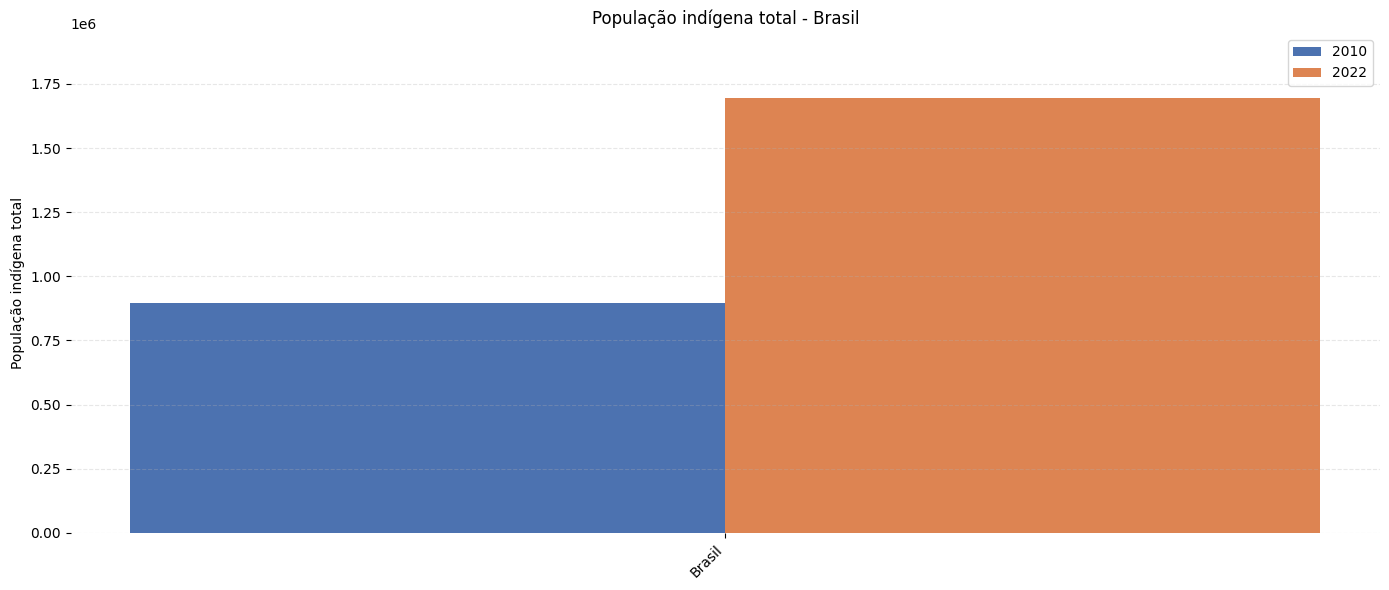

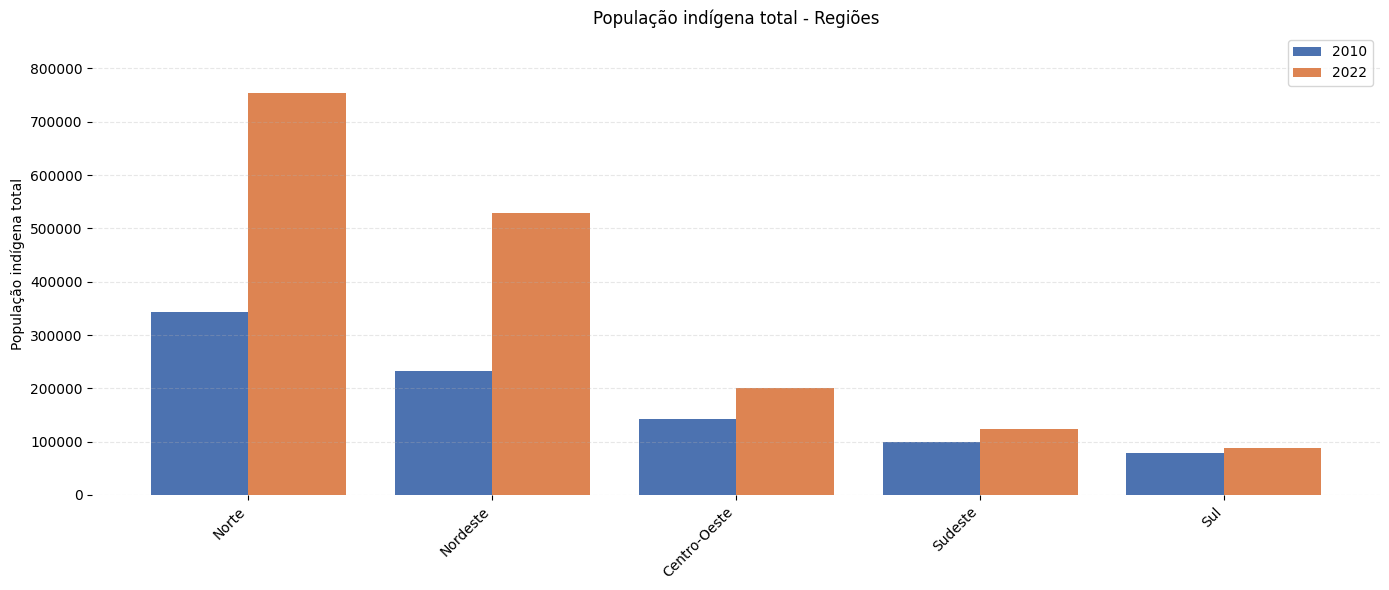

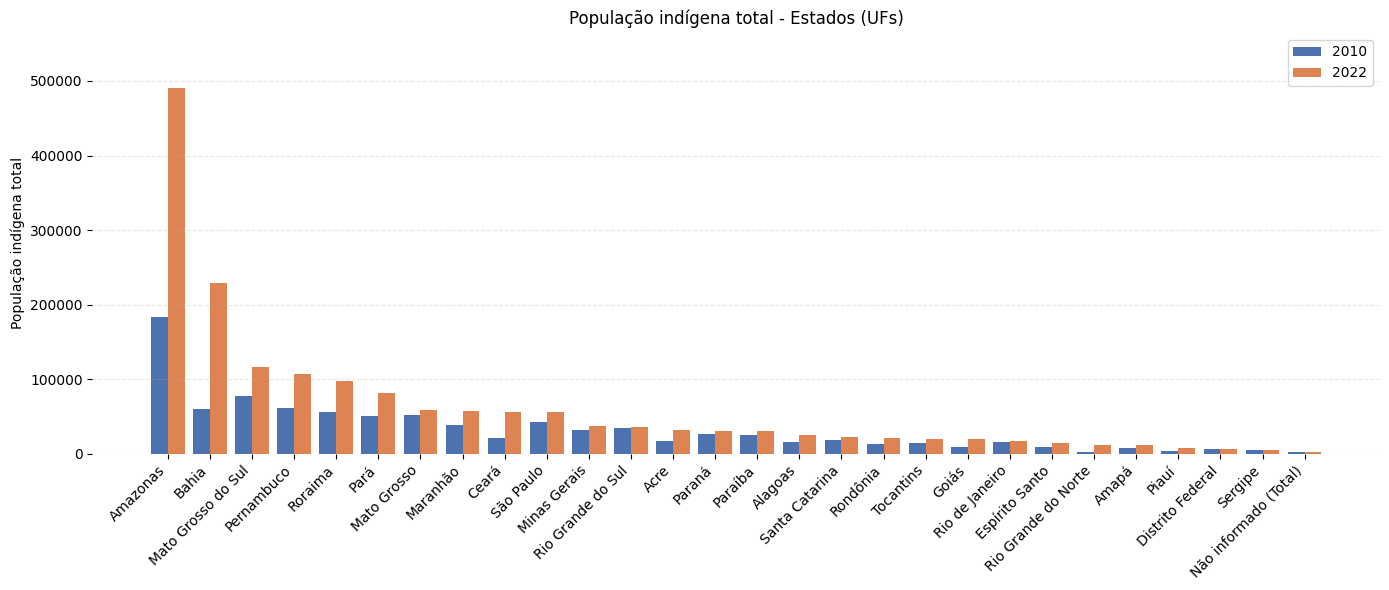

In [631]:
plot_populacao_indigena(df_brasil, 'População indígena total - Brasil')
plot_populacao_indigena(df_regioes, 'População indígena total - Regiões')
plot_populacao_indigena(df_estados, 'População indígena total - Estados (UFs)')


# Distribuição urbano vs rural em 2022

In [632]:
db['% Urbano 2022'] = db['% Indígenas 2022 Urbano']
db['% Rural 2022'] = db['% Indígenas 2022 Rural']

db[['% Urbano 2022', '% Rural 2022']].describe()


,% Urbano 2022,% Rural 2022
count,34.000000,33.000000
mean,110.391759,47.535763
std,338.497898,22.490616
min,17.336692,4.478147
25%,38.031662,37.701464
50%,52.819371,48.333796
75%,62.301696,62.050032
max,2022.000000,82.663308


In [633]:
def plot_percentual_urbano_rural(df, titulo):
    dados_plot = df[['Localidade', '% Indígenas 2022 Urbano', '% Indígenas 2022 Rural']].copy()

    # Remove linhas inválidas
    dados_plot = dados_plot.dropna(subset=['% Indígenas 2022 Urbano', '% Indígenas 2022 Rural'])
    dados_plot = dados_plot[dados_plot['Localidade'] != 'Não informado']

    dados_plot.columns = ['Localidade', '% Urbano 2022', '% Rural 2022']
    dados_plot = dados_plot.set_index('Localidade')

    fig, ax = plt.subplots(figsize=(16,6))

    cores = ['#2E86AB', '#F6AA1C']  # azul e amarelo suaves

    dados_plot.plot(kind='bar', stacked=True, color=cores, edgecolor='gray', width=1.0, linewidth=0.7, ax=ax)

    ax.set_ylim(0, 100)
    ax.set_yticks(np.arange(0, 101, 20))
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    plt.title(titulo, fontsize=16, weight='bold', pad=15)
    plt.ylabel('Percentual (%)', fontsize=12)
    plt.xlabel('Localidade', fontsize=12)

    leg = ax.legend(title='Categoria', fontsize=11, title_fontsize=13)
    leg.get_frame().set_alpha(0.9)

    # Rótulos dentro das barras para valores > 5%
    for p in ax.patches:
        height = p.get_height()
        if height > 5:
            ax.annotate(f'{height:.1f}%',
                        (p.get_x() + p.get_width() / 2, p.get_y() + height / 2),
                        ha='center', va='center', fontsize=9, color='white', weight='bold')

    plt.tight_layout()
    plt.show()


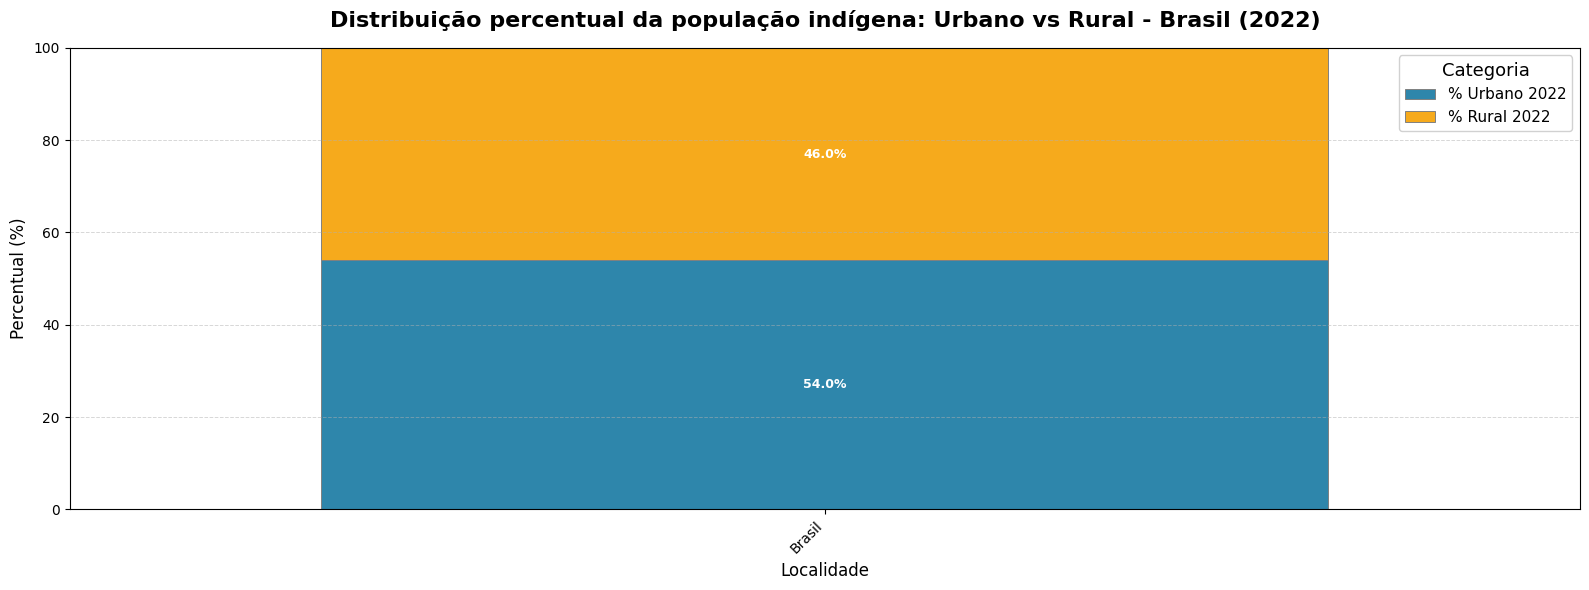

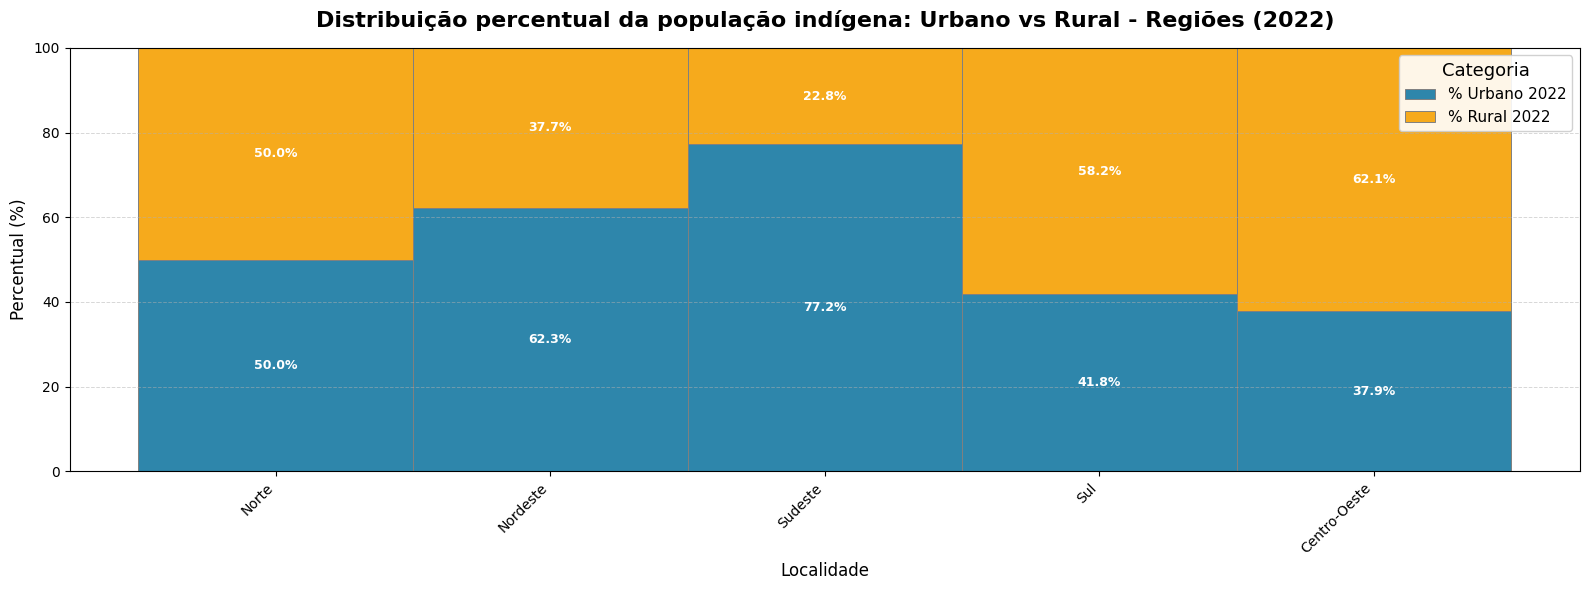

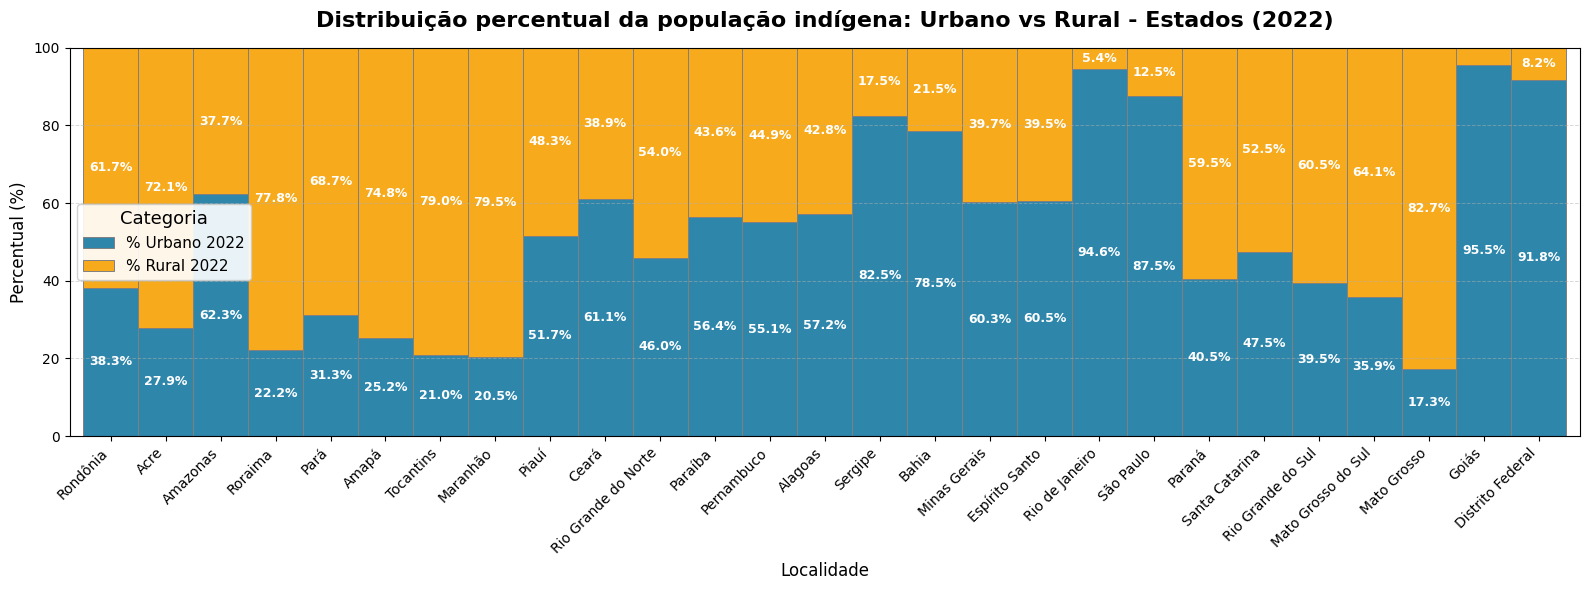

In [634]:
plot_percentual_urbano_rural(df_brasil, 'Distribuição percentual da população indígena: Urbano vs Rural - Brasil (2022)')
plot_percentual_urbano_rural(df_regioes, 'Distribuição percentual da população indígena: Urbano vs Rural - Regiões (2022)')
plot_percentual_urbano_rural(df_estados, 'Distribuição percentual da população indígena: Urbano vs Rural - Estados (2022)')

# Análise territorial – dentro vs fora de TI em 2022

In [635]:
db[['Indígenas 2022 TI Total', 'Indígenas 2022 Fora TI Total']].describe()


,Indígenas 2022 TI Total,Indígenas 2022 Fora TI Total
count,31.000000,3.300000e+01
mean,60275.225806,9.745382e+04
std,122318.880874,2.081212e+05
min,114.000000,3.481000e+03
25%,9187.000000,1.109600e+04
50%,17211.000000,1.917300e+04
75%,43497.000000,5.115200e+04
max,622844.000000,1.071992e+06


In [636]:
def plot_populacao_territorio(df, titulo):
    # Copia e remove 'Não informado'
    dados = df[['Localidade', 'Indígenas 2022 TI Total', 'Indígenas 2022 Fora TI Total']].copy()
    dados = dados[dados['Localidade'] != 'Não informado']
    dados = dados.set_index('Localidade')

    fig, ax = plt.subplots(figsize=(14,7))

    cores = ['#2E86AB', '#F6AA1C']  # azul e amarelo harmoniosos

    dados.plot(kind='bar', stacked=False, color=cores, edgecolor='gray', linewidth=0.8, ax=ax)

    ax.set_title(titulo, fontsize=18, weight='bold', pad=20)
    ax.set_ylabel('Número de pessoas', fontsize=14)
    ax.set_xlabel('Localidade', fontsize=14)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11)
    ax.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.5)

    leg = ax.legend(title='Localização', fontsize=12, title_fontsize=14)
    leg.get_frame().set_alpha(0.9)

    plt.tight_layout()
    plt.show()

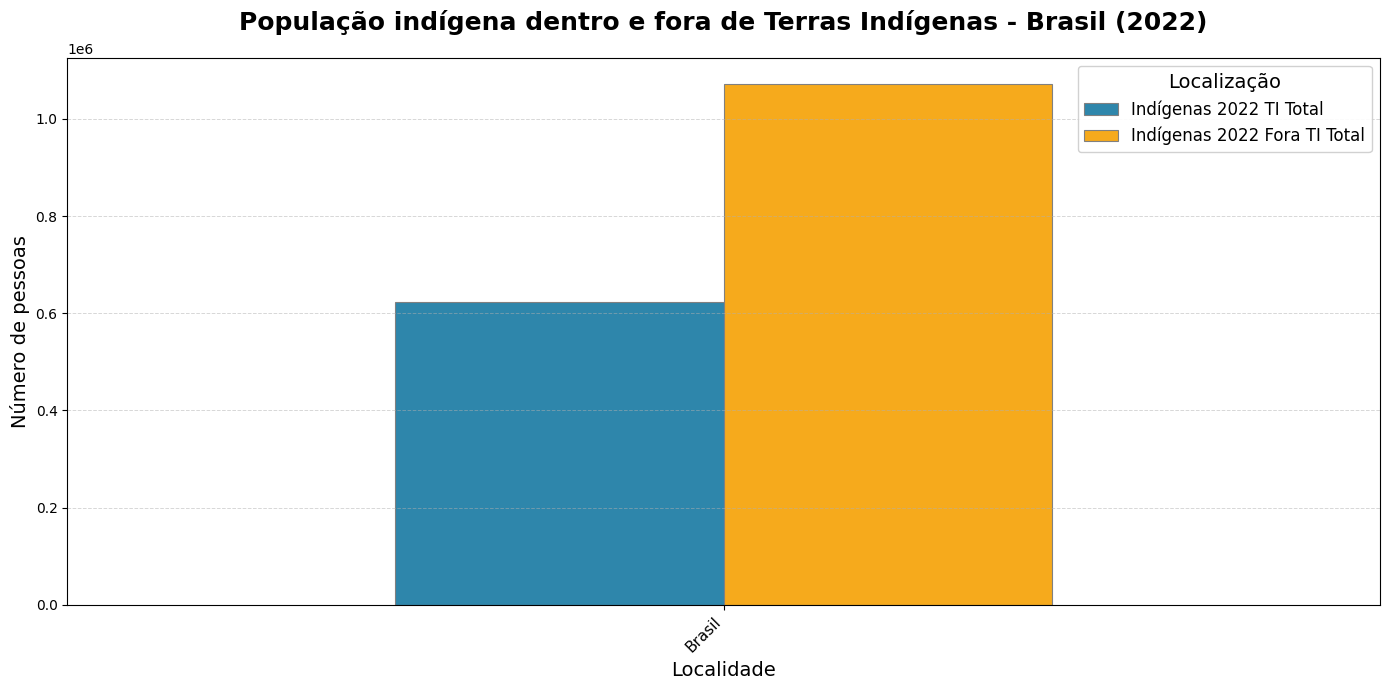

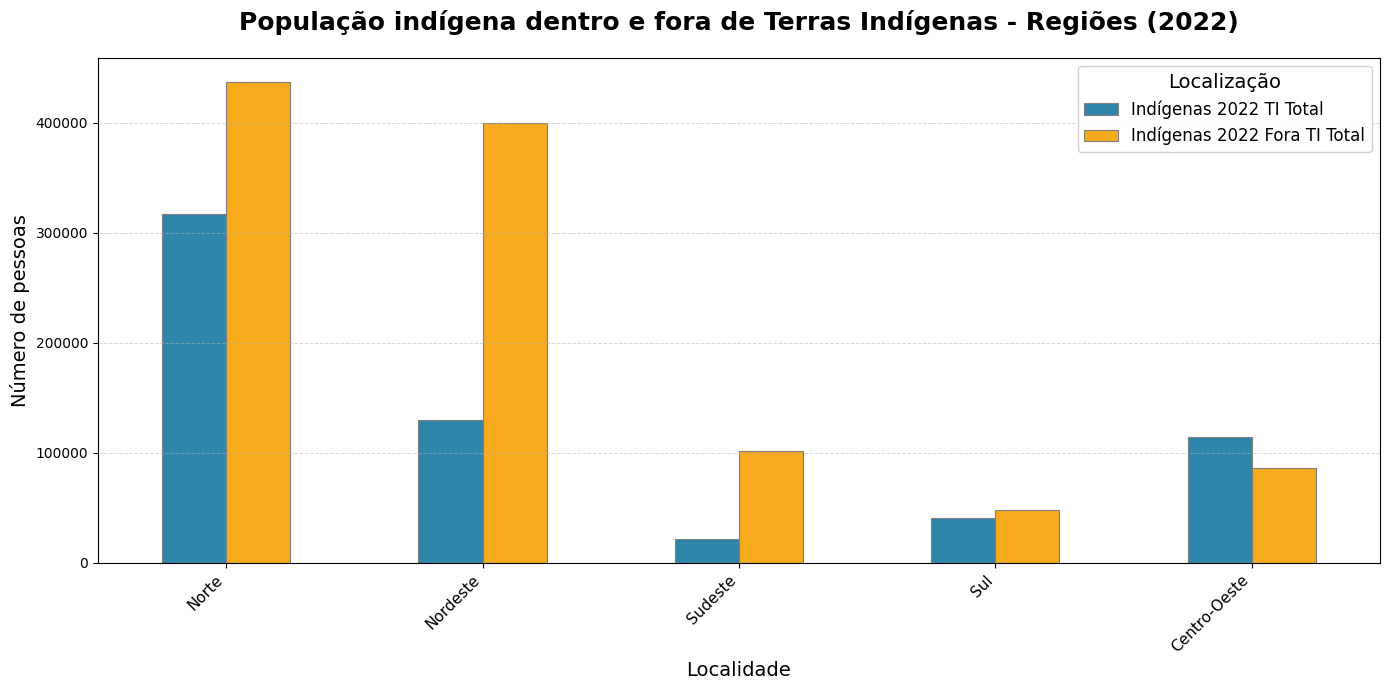

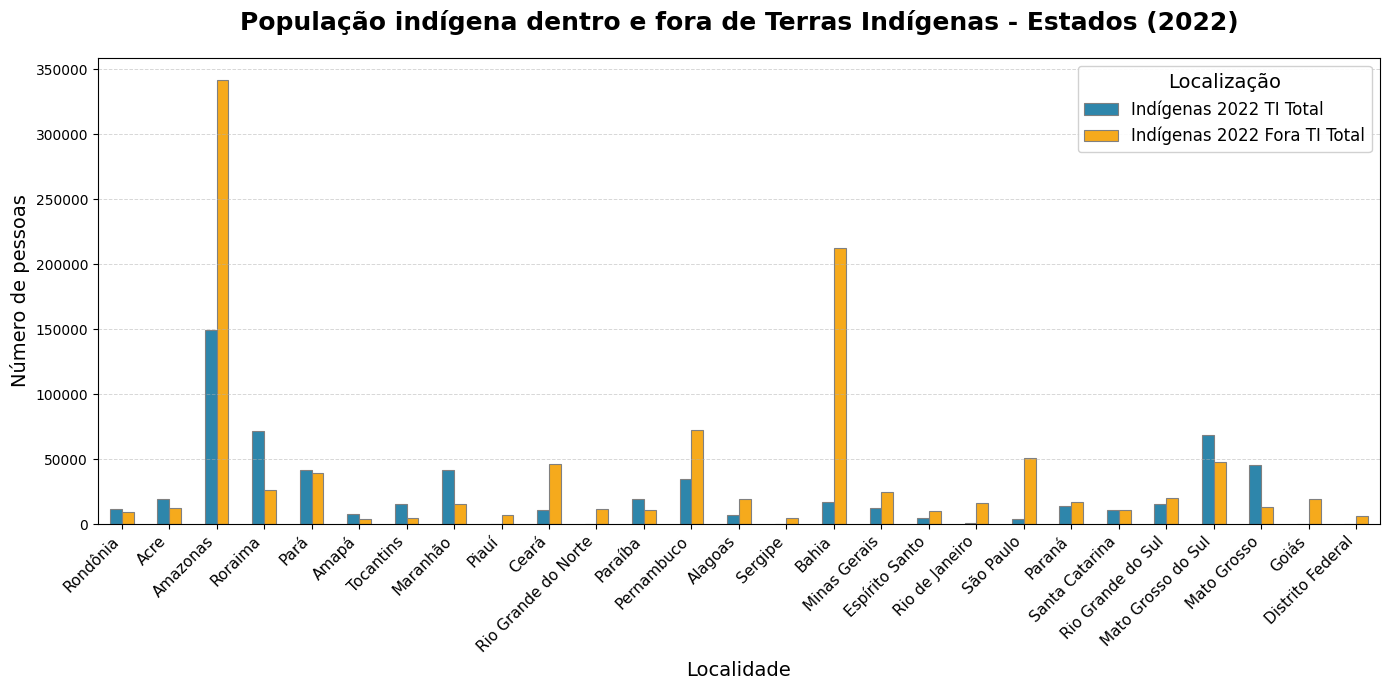

In [637]:
# Exemplo de uso com seus dataframes já separados:
plot_populacao_territorio(df_brasil, 'População indígena dentro e fora de Terras Indígenas - Brasil (2022)')
plot_populacao_territorio(df_regioes, 'População indígena dentro e fora de Terras Indígenas - Regiões (2022)')
plot_populacao_territorio(df_estados, 'População indígena dentro e fora de Terras Indígenas - Estados (2022)')

# Variação percentual urbana/rural entre 2010 e 2022

In [638]:
db['Δ % Urbano'] = db['% Indígenas 2022 Urbano'] - db['% Indígenas 2010 Urbano']
db['Δ % Rural'] = db['% Indígenas 2022 Rural'] - db['% Indígenas 2010 Rural']

db[['Localidade', 'Δ % Urbano', 'Δ % Rural']].sort_values(by='Δ % Urbano', ascending=False)


,Localidade,Δ % Urbano,Δ % Rural
15,Amazonas,43.603358,-43.603358
12,Norte,32.040444,-32.040444
27,Alagoas,18.975762,-18.975762
11,Brasil,17.755809,-17.755809
40,Mato Grosso do Sul,16.605174,-16.605174
13,Rondônia,16.052821,-16.052821
29,Bahia,15.162718,-15.162718
39,Centro-Oeste,13.439399,-13.439399
14,Acre,13.157339,-13.157339
20,Nordeste,13.144334,-13.144334


In [639]:
# Garante que a variação percentual seja criada
for df in [df_brasil, df_regioes, df_estados]:
    df['Δ % Urbano'] = df['% Indígenas 2022 Urbano'] - df['% Indígenas 2010 Urbano']
    df['Δ % Rural'] = df['% Indígenas 2022 Rural'] - df['% Indígenas 2010 Rural']


In [640]:
def plot_variacao_percentual_urbano_rural(df, titulo):
    # Seleciona e prepara os dados
    dados_var = df[['Localidade', 'Δ % Urbano', 'Δ % Rural']].copy()
    dados_var = dados_var.dropna(subset=['Δ % Urbano', 'Δ % Rural'])
    dados_var = dados_var[dados_var['Localidade'] != 'Não informado']
    dados_var = dados_var.set_index('Localidade')

    # Cores distintas para facilitar leitura
    cores = ['#1f77b4', '#ff7f0e']  # azul e laranja

    fig, ax = plt.subplots(figsize=(16,6))
    dados_var.plot(kind='bar', color=cores, edgecolor='gray', width=0.85, ax=ax)

    plt.axhline(0, color='black', linestyle='--', linewidth=1)
    ax.set_ylabel('Variação percentual (p.p.)', fontsize=12)
    ax.set_title(titulo, fontsize=16, weight='bold', pad=15)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    ax.grid(axis='y', linestyle='--', linewidth=0.6, alpha=0.5)
    ax.legend(title='Categoria', fontsize=11, title_fontsize=13)
    ax.set_axisbelow(True)

    plt.tight_layout()
    plt.show()


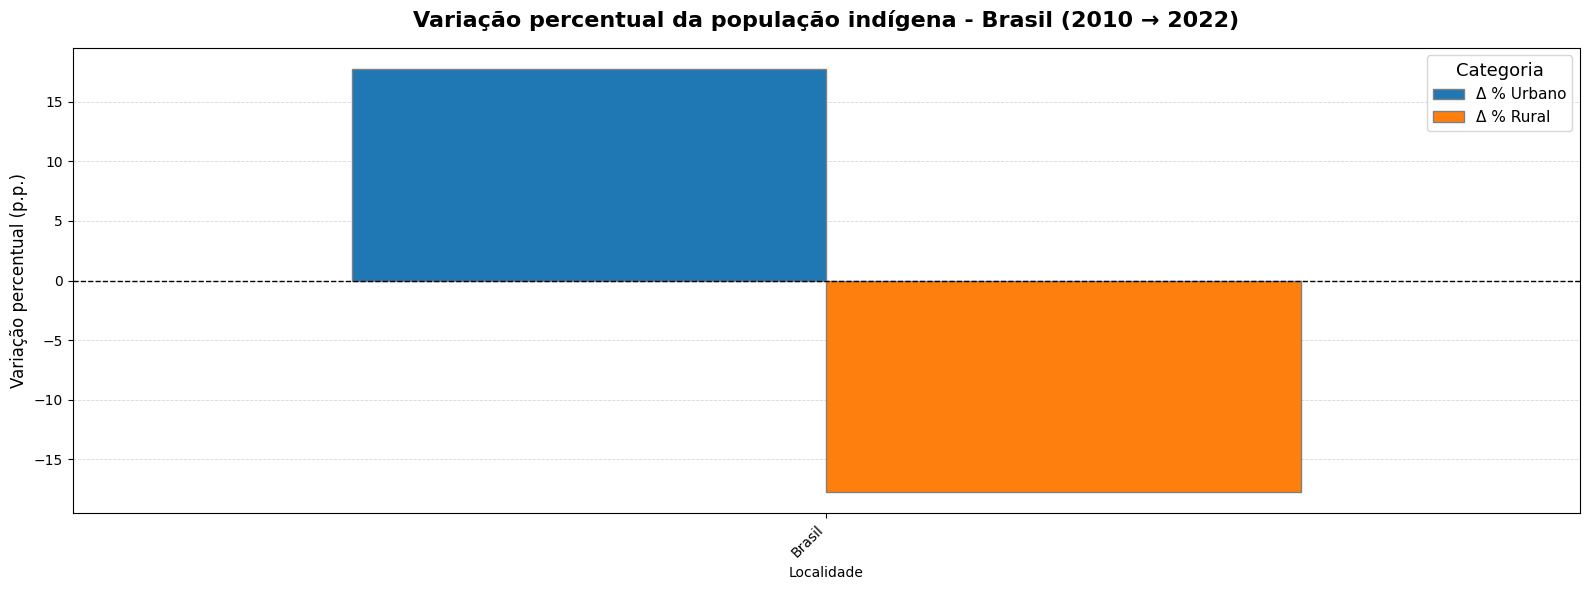

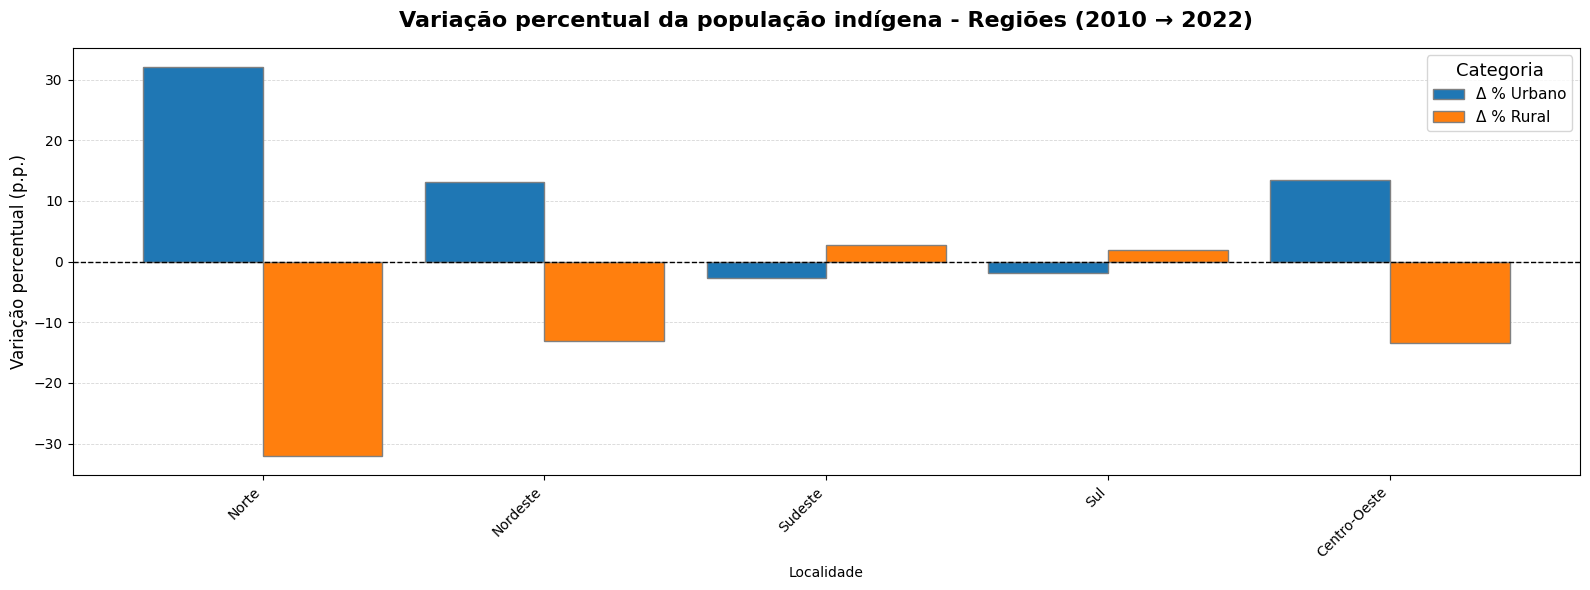

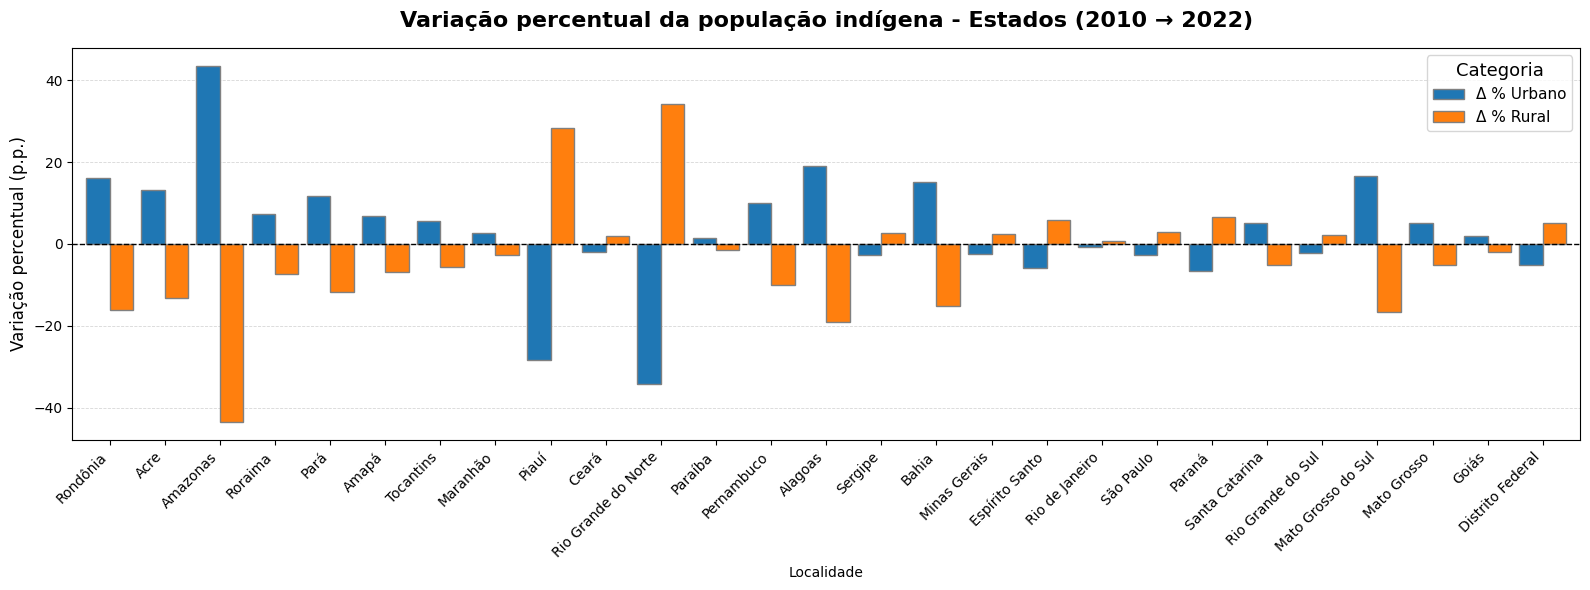

In [641]:
plot_variacao_percentual_urbano_rural(df_brasil, 'Variação percentual da população indígena - Brasil (2010 → 2022)')
plot_variacao_percentual_urbano_rural(df_regioes, 'Variação percentual da população indígena - Regiões (2010 → 2022)')
plot_variacao_percentual_urbano_rural(df_estados, 'Variação percentual da população indígena - Estados (2010 → 2022)')